In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 6

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
28/31 [==========================>...] - ETA: 0s - loss: 1.7206 - accuracy: 0.2241  
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 4s 11ms/step - loss: 1.7132 - accuracy: 0.2347 - val_loss: 1.5890 - val_accuracy: 0.4456
Epoch 2/1000
26/31 [========================>.....] - ETA: 0s - loss: 1.5773 - accuracy: 0.3450
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 1.5623 - accuracy: 0.3512 - val_loss: 1.4538 - val_accuracy: 0.4686
Epoch 3/1000
 1/31 [..............................] - ETA: 0s - loss: 1.4976 - accuracy: 0.3984
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 1.4857 - accuracy: 0.4018 - val_loss: 1.3649 - val_accuracy: 0.5744
Epoch 4/1000
28/31 [==========================>...] - ETA: 0s - loss: 1.4228 - accuracy: 0.442

24/31 [======================>.......] - ETA: 0s - loss: 0.8075 - accuracy: 0.6947
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 0.8257 - accuracy: 0.6861 - val_loss: 0.5503 - val_accuracy: 0.8474
Epoch 29/1000
24/31 [======================>.......] - ETA: 0s - loss: 0.8482 - accuracy: 0.6699
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8501 - accuracy: 0.6720 - val_loss: 0.5446 - val_accuracy: 0.8620
Epoch 30/1000
 1/31 [..............................] - ETA: 0s - loss: 0.7594 - accuracy: 0.7344
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.8554 - accuracy: 0.6700 - val_loss: 0.5436 - val_accuracy: 0.8566
Epoch 31/1000
27/31 [=========================>....] - ETA: 0s - loss: 0.8314 - accuracy: 0.6797
Epoch 31

28/31 [==========================>...] - ETA: 0s - loss: 0.7423 - accuracy: 0.7316
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.7379 - accuracy: 0.7342 - val_loss: 0.3868 - val_accuracy: 0.9279
Epoch 56/1000
23/31 [=====================>........] - ETA: 0s - loss: 0.7174 - accuracy: 0.7357
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.7122 - accuracy: 0.7380 - val_loss: 0.3836 - val_accuracy: 0.9294
Epoch 57/1000
29/31 [===========================>..] - ETA: 0s - loss: 0.7117 - accuracy: 0.7328
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.7098 - accuracy: 0.7326 - val_loss: 0.3730 - val_accuracy: 0.9302
Epoch 58/1000
30/31 [============================>.] - ETA: 0s - loss: 0.7117 - accuracy: 0.7453
Epoch 58

27/31 [=========================>....] - ETA: 0s - loss: 0.6573 - accuracy: 0.7532
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.6571 - accuracy: 0.7554 - val_loss: 0.3196 - val_accuracy: 0.9525
Epoch 83/1000
 1/31 [..............................] - ETA: 0s - loss: 0.7084 - accuracy: 0.7812
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.6293 - accuracy: 0.7743 - val_loss: 0.3092 - val_accuracy: 0.9525
Epoch 84/1000
 1/31 [..............................] - ETA: 0s - loss: 0.7649 - accuracy: 0.7266
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.6471 - accuracy: 0.7756 - val_loss: 0.3126 - val_accuracy: 0.9563
Epoch 85/1000
30/31 [============================>.] - ETA: 0s - loss: 0.6689 - accuracy: 0.7586
Epoch 85

 1/31 [..............................] - ETA: 0s - loss: 0.6405 - accuracy: 0.7656
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.6474 - accuracy: 0.7661 - val_loss: 0.2970 - val_accuracy: 0.9586
Epoch 110/1000
24/31 [======================>.......] - ETA: 0s - loss: 0.6567 - accuracy: 0.7676
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.6506 - accuracy: 0.7669 - val_loss: 0.3034 - val_accuracy: 0.9555
Epoch 111/1000
28/31 [==========================>...] - ETA: 0s - loss: 0.6525 - accuracy: 0.7631
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.6472 - accuracy: 0.7648 - val_loss: 0.2982 - val_accuracy: 0.9578
Epoch 112/1000
 1/31 [..............................] - ETA: 0s - loss: 0.7442 - accuracy: 0.7734
Ep

Epoch 136/1000
 1/31 [..............................] - ETA: 0s - loss: 0.5755 - accuracy: 0.7969
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.5917 - accuracy: 0.7853 - val_loss: 0.2765 - val_accuracy: 0.9594
Epoch 137/1000
 1/31 [..............................] - ETA: 0s - loss: 0.7138 - accuracy: 0.7734
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.6239 - accuracy: 0.7735 - val_loss: 0.2814 - val_accuracy: 0.9586
Epoch 138/1000
30/31 [============================>.] - ETA: 0s - loss: 0.6156 - accuracy: 0.7779
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.6126 - accuracy: 0.7791 - val_loss: 0.2805 - val_accuracy: 0.9609
Epoch 139/1000
28/31 [==========================>...] - ETA: 0s - loss: 0.6127 - accu

Epoch 163/1000
 1/31 [..............................] - ETA: 0s - loss: 0.7785 - accuracy: 0.8047
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.6083 - accuracy: 0.7802 - val_loss: 0.2752 - val_accuracy: 0.9586
Epoch 164/1000
30/31 [============================>.] - ETA: 0s - loss: 0.5949 - accuracy: 0.7875
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.5960 - accuracy: 0.7873 - val_loss: 0.2707 - val_accuracy: 0.9586
Epoch 165/1000
31/31 [==============================] - ETA: 0s - loss: 0.6204 - accuracy: 0.7786
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 0.6204 - accuracy: 0.7786 - val_loss: 0.2740 - val_accuracy: 0.9563
Epoch 166/1000
 1/31 [..............................] - ETA: 0s - loss: 0.4967 - accu

Epoch 190/1000
 1/31 [..............................] - ETA: 0s - loss: 0.7242 - accuracy: 0.7344
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.6156 - accuracy: 0.7876 - val_loss: 0.2669 - val_accuracy: 0.9609
Epoch 191/1000
 1/31 [..............................] - ETA: 0s - loss: 0.5198 - accuracy: 0.8203
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.5833 - accuracy: 0.7901 - val_loss: 0.2629 - val_accuracy: 0.9609
Epoch 192/1000
 1/31 [..............................] - ETA: 0s - loss: 0.6571 - accuracy: 0.7500
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 3ms/step - loss: 0.6250 - accuracy: 0.7745 - val_loss: 0.2806 - val_accuracy: 0.9486
Epoch 193/1000
28/31 [==========================>...] - ETA: 0s - loss: 0.5927 - accu

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 0.9594


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 118ms/step
[6.9873491e-03 9.8953044e-01 3.4756393e-03 2.5700628e-10 6.5191889e-06
 1.0579805e-08]
1


# 混同行列

41/41 [==============================] - 0s 1ms/step


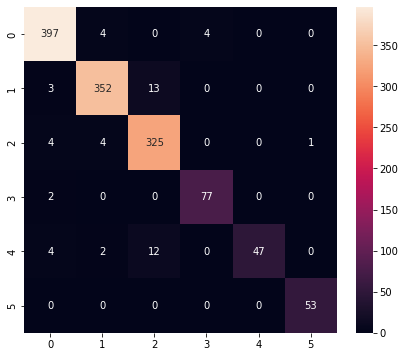

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       405
           1       0.97      0.96      0.96       368
           2       0.93      0.97      0.95       334
           3       0.95      0.97      0.96        79
           4       1.00      0.72      0.84        65
           5       0.98      1.00      0.99        53

    accuracy                           0.96      1304
   macro avg       0.97      0.93      0.95      1304
weighted avg       0.96      0.96      0.96      1304



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\satya\AppData\Local\Temp\tmpi91bvzme\assets


6576

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.9873454e-03 9.8953044e-01 3.4756390e-03 2.5700575e-10 6.5191821e-06
 1.0579826e-08]
1
